In [1]:
from Neuro_Shit.Plotting import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/home/sage/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('Test_with_new_names.csv', sep='\t')

In [4]:
mapping = load_mapping('destr_mapping.txt')

In [13]:
lh, rh, label_names, fs_avg = get_setup(fs_home='/mnt/sda5/freesurfer', destr=True, fs5=True)

In [11]:
chunk = get_chunk_from_df(data, name_col='ROI', value_col='value', keys=['smri_area_cort', '.lh'])
surface = get_surface(chunk, lh, mapping, label_names)

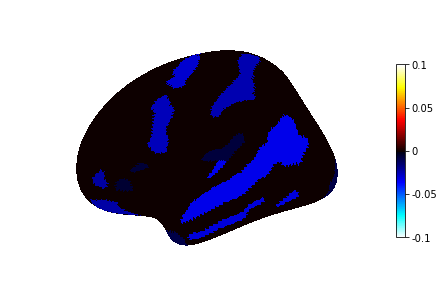

In [24]:
base_surf_plot(surface, 'lh', True, fs_avg, view='lateral', avg_method='median', colorbar=True, cmap='cold_hot', vmin=-.1, vmax=.1, figure=fig)


In [33]:
KEYS = ['smri_thick_cort', 'smri_area_cort']
titles = ['Cortical Thickness', 'Cortical Area']

/home/sage/anaconda3/lib/python3.6/site-packages/Neuro_Shit/plot_surf.py:231: RuntimeWarning: invalid value encountered in true_divide
  surf_map_faces = surf_map_faces / (vmax - vmin)


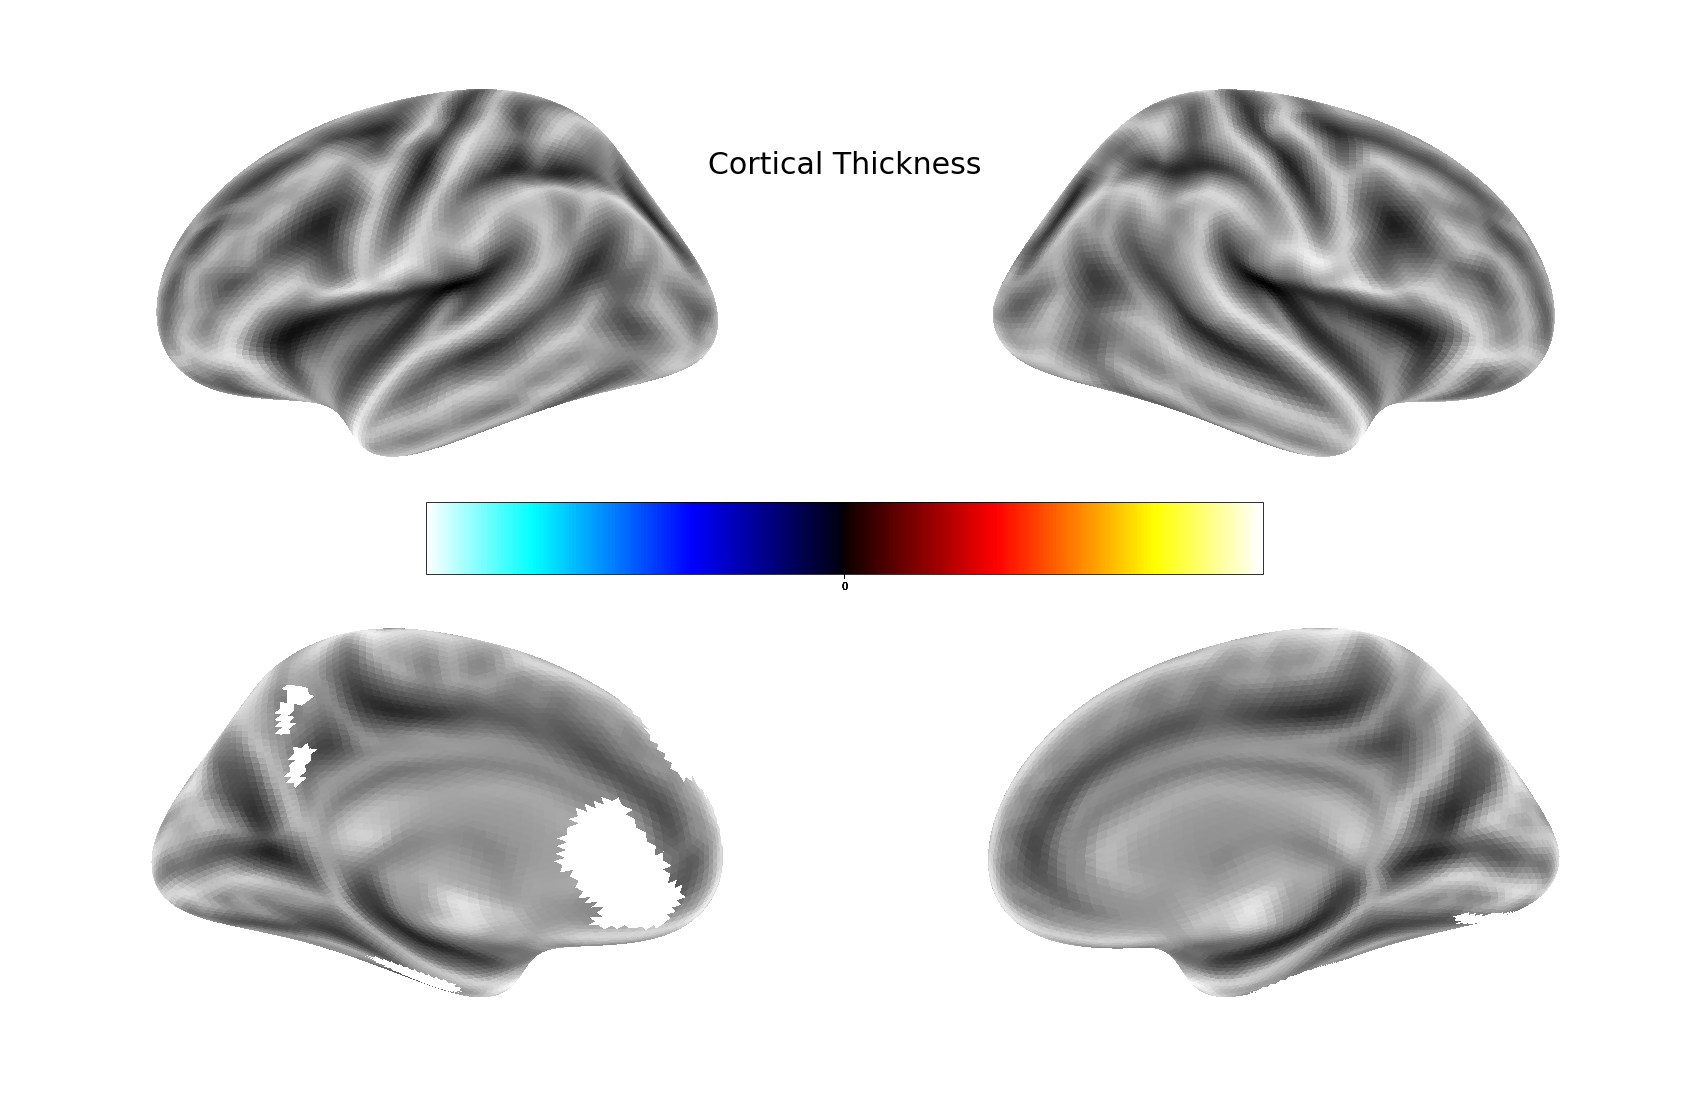

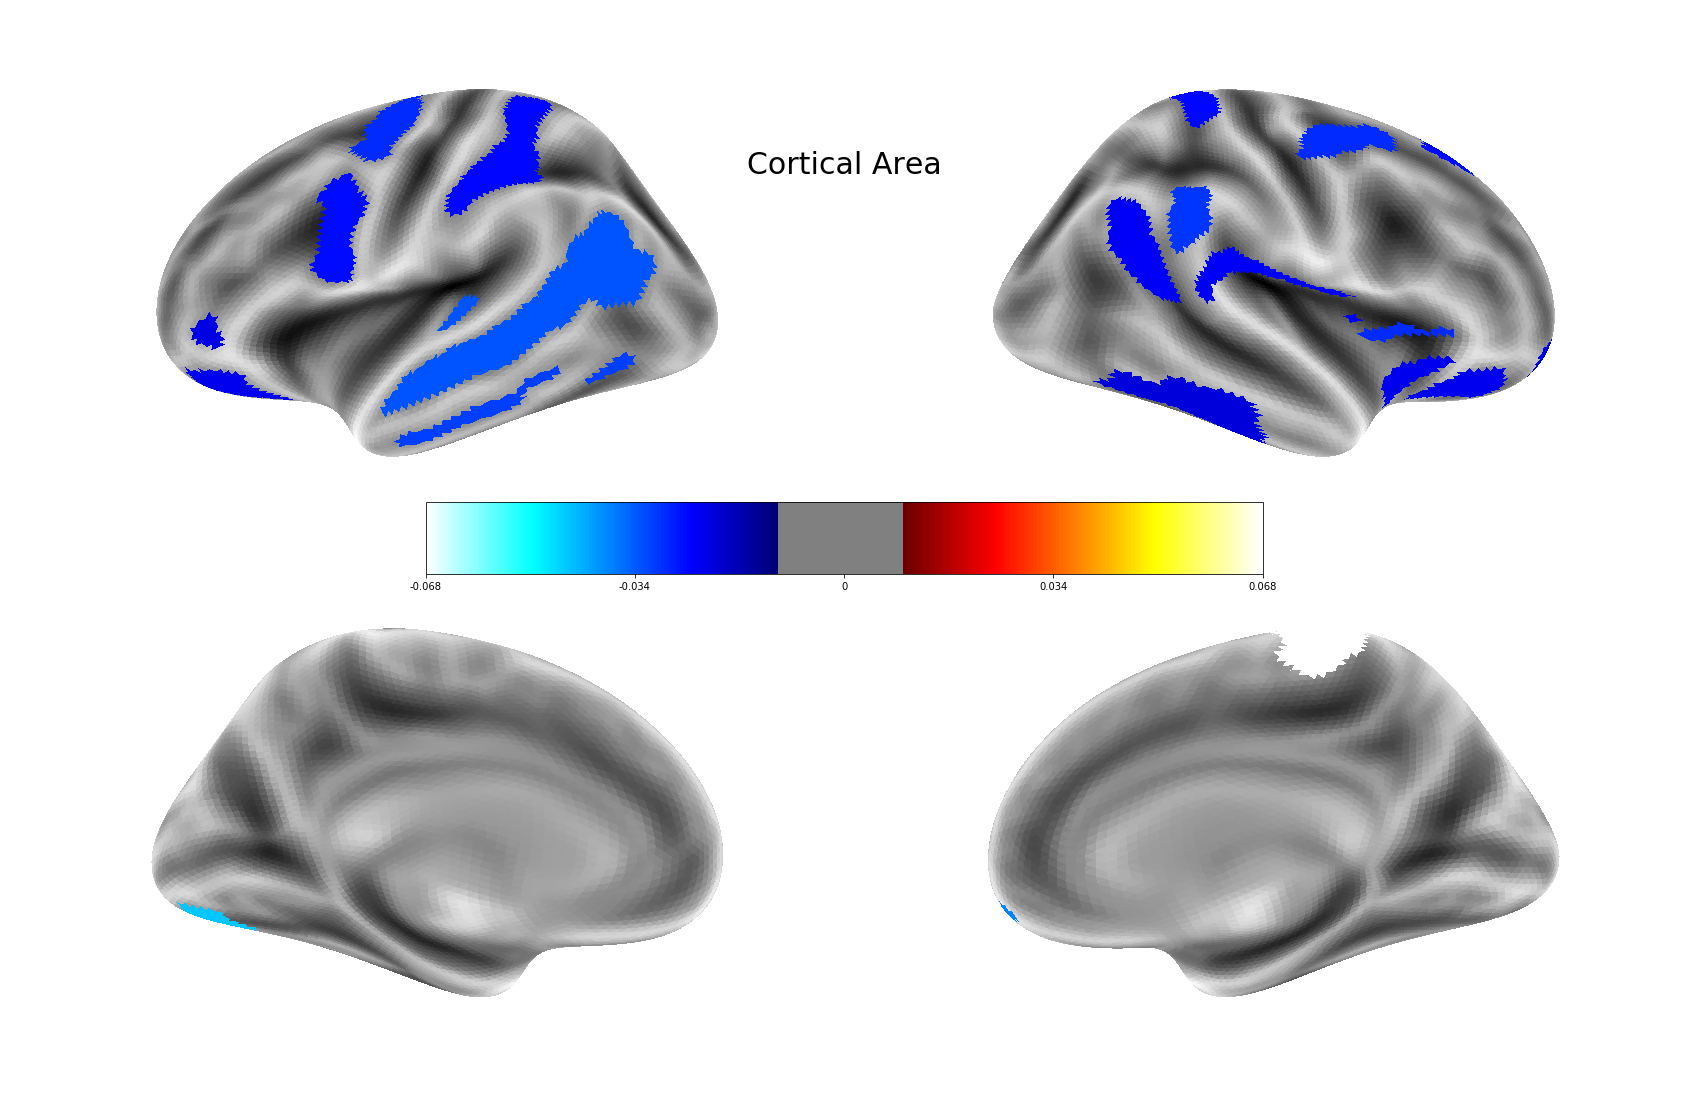

In [34]:
for k, title in zip(KEYS, titles):

    chunk = get_chunk_from_df(data, name_col='ROI', value_col='value', keys=[k])
    surfaces = get_hemi_surfaces(chunk, '.lh', '.rh', lh, rh, label_names, mapping)

    base_surf_collage(surfaces, True,
                      fs_avg,
                      title=title,
                      cmap='cold_hot',
                      threshold=.01,
                      avg_method='median',
                      figsize=(30, 20)
                     )